In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(16, activation='relu', name ='layer_1'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])

In [4]:
# Print the model summary

# model.weights
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [7]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimaizer = opt, 
             loss = 'sparse_categorical_crossentropy',
             metrics = [acc, mae])

In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7c535c740080>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7c535c740198>]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [11]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [13]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [14]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

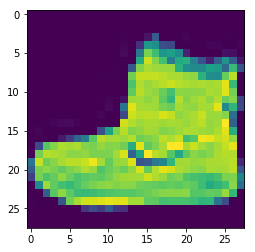

label: Ankle boot


In [15]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [20]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=5, batch_size=256)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 55s 922us/sample - loss: 0.4377 - sparse_categorical_accuracy: 0.8468 - mean_absolute_error: 4.4200
Epoch 2/5
60000/60000 [==============================] - 53s 892us/sample - loss: 0.4071 - sparse_categorical_accuracy: 0.8568 - mean_absolute_error: 4.4200
Epoch 3/5
60000/60000 [==============================] - 53s 878us/sample - loss: 0.3881 - sparse_categorical_accuracy: 0.8639 - mean_absolute_error: 4.4200
Epoch 4/5
60000/60000 [==============================] - 53s 882us/sample - loss: 0.3723 - sparse_categorical_accuracy: 0.8698 - mean_absolute_error: 4.4200
Epoch 5/5
60000/60000 [==============================] - 53s 885us/sample - loss: 0.3618 - sparse_categorical_accuracy: 0.8737 - mean_absolute_error: 4.4200


#### Plot training history

In [23]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head

<bound method NDFrame.head of        loss  sparse_categorical_accuracy  mean_absolute_error
0  0.437724                     0.846767             4.420000
1  0.407134                     0.856783             4.420001
2  0.388053                     0.863917             4.420000
3  0.372286                     0.869833             4.420001
4  0.361777                     0.873650             4.420000>

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

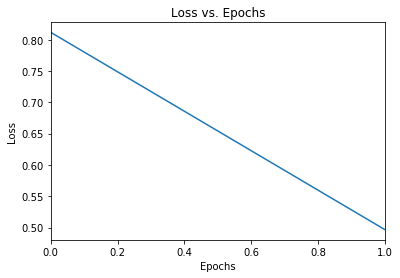

In [19]:
# Make a plot for the loss

loss_plot = df.plot(y="loss", title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

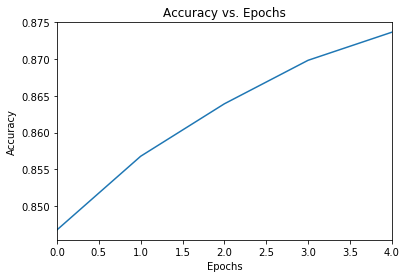

In [24]:
# Make a plot for the accuracy

acc_plot = df.plot(y="sparse_categorical_accuracy", title="Accuracy vs. Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

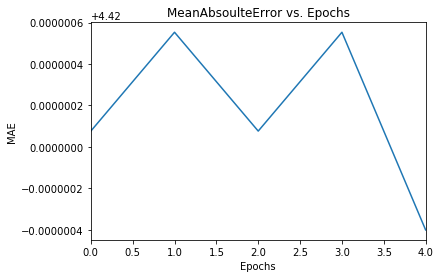

In [25]:
# Make a plot for the additional metric

mae_plot = df.plot(y="mean_absolute_error", title="MeanAbsoulteError vs. Epochs", legend=False)
mae_plot.set(xlabel="Epochs", ylabel="MAE")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [29]:
# Evaluate the model

loss, acc, mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 0.3247 - sparse_categorical_accuracy: 0.8673 - mean_absolute_error: 4.4200


#### Make predictions from the model

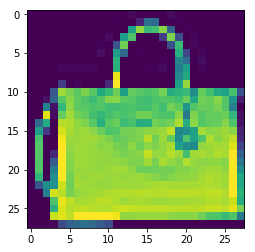

Label: Bag


In [30]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[inx]]}")

In [33]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model predictions: {labels[np.argmax(predictions)]}")

Model predictions: Bag
